# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | vila velha
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | baneh
Processing Record 7 of Set 1 | mil'kovo
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | cestos city
Processing Record 10 of Set 1 | santa fe de antioquia
Processing Record 11 of Set 1 | belmopan
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | yoichi
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | lalibela
Processing Record 17 of Set 1 | sao jose da coroa grande
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | peterhead
Processing Record 20 of Set 1 | luganville
Processing Record 21 of Set 1 | turkmenbasy
Processing Record 22 of Set 1 | williamsp

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,289.92,59,56,6.80,AU,1706983366
1,iqaluit,63.7506,-68.5145,248.00,69,20,5.14,CA,1706983445
2,vila velha,-20.3297,-40.2925,304.12,80,75,4.63,BR,1706983276
3,yellowknife,62.4560,-114.3525,255.60,96,100,7.20,CA,1706983308
4,west island,-12.1568,96.8225,301.14,83,40,4.63,CC,1706983508


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,289.92,59,56,6.80,AU,1706983366
1,iqaluit,63.7506,-68.5145,248.00,69,20,5.14,CA,1706983445
2,vila velha,-20.3297,-40.2925,304.12,80,75,4.63,BR,1706983276
3,yellowknife,62.4560,-114.3525,255.60,96,100,7.20,CA,1706983308
4,west island,-12.1568,96.8225,301.14,83,40,4.63,CC,1706983508


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

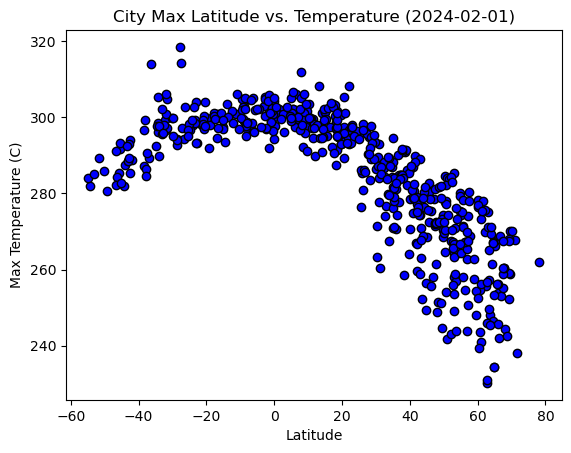

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2024-02-01)')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

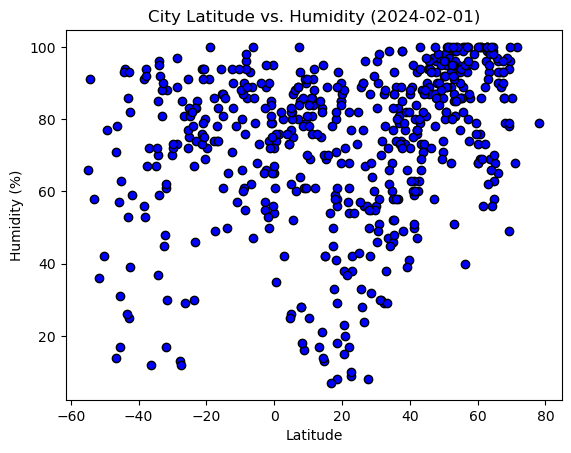

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024-02-01)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

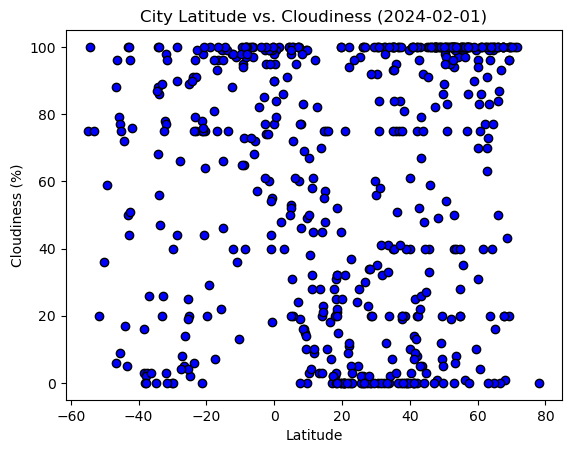

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-02-01)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

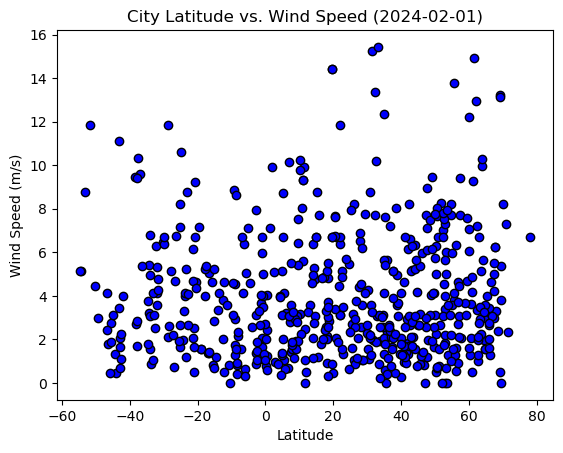

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024-02-01)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def regression_plot(x_values, y_values, x_label, y_label, hemisphere, coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))  
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}")
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    plt.annotate(line_eq,coord, color="red")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The r value is {round(correlation[0],2)}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=pd.DataFrame(city_data_df.loc[city_data_df['Lat']>=0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iqaluit,63.7506,-68.5145,248.00,69,20,5.14,CA,1706983445
3,yellowknife,62.4560,-114.3525,255.60,96,100,7.20,CA,1706983308
5,baneh,35.9975,45.8853,270.73,89,95,2.35,IR,1706983509
6,mil'kovo,55.6078,37.7956,271.37,89,99,3.83,RU,1706983418
7,talnakh,69.4865,88.3972,258.82,96,100,3.81,RU,1706983336


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=pd.DataFrame(city_data_df.loc[city_data_df['Lat']<0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,289.92,59,56,6.80,AU,1706983366
2,vila velha,-20.3297,-40.2925,304.12,80,75,4.63,BR,1706983276
4,west island,-12.1568,96.8225,301.14,83,40,4.63,CC,1706983508
12,grytviken,-54.2811,-36.5092,282.04,91,100,5.12,GS,1706983330
14,waitangi,-43.9535,-176.5597,287.49,94,17,0.45,NZ,1706983267


###  Temperature vs. Latitude Linear Regression Plot

The r value is -0.85


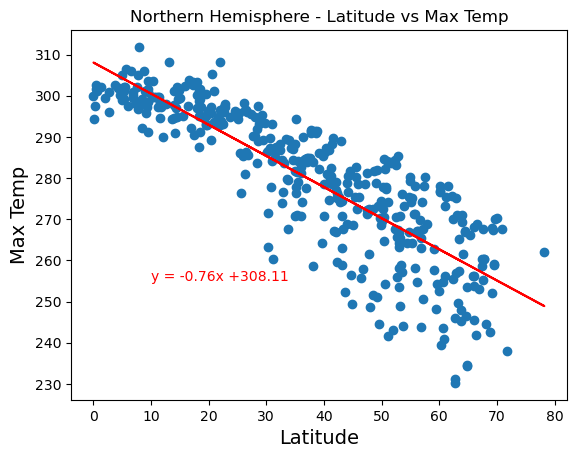

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
regression_plot(x_values, y_values, "Latitude", "Max Temp", "Northern", (10,255))

The r value is 0.63


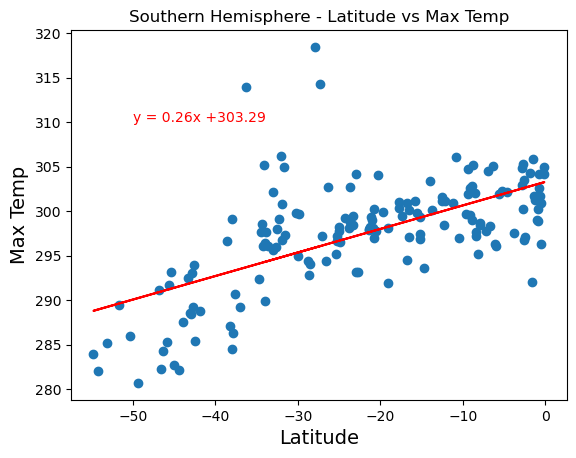

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
regression_plot(x_values, y_values, "Latitude", "Max Temp", "Southern", (-50,310))

There is a strong negative correlation between Lattitude and temperature for the northern hemisphere, but there is a moderate positive correlation for the southern hempisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r value is 0.42


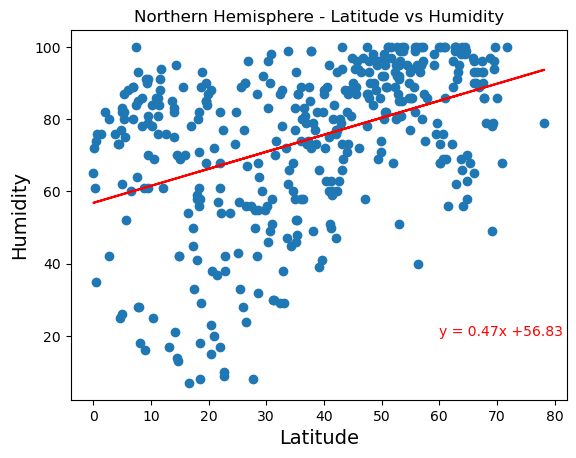

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
regression_plot(x_values, y_values, "Latitude", "Humidity", "Northern", (60,20))

The r value is 0.27


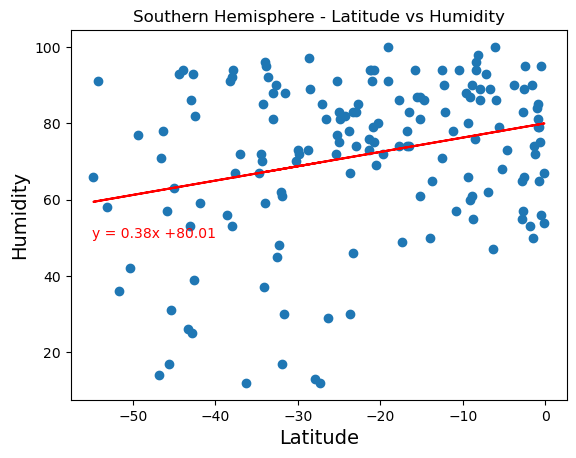

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
regression_plot(x_values, y_values, "Latitude", "Humidity", "Southern", (-55,50))

There is a moderate positive correlation between Lattitude and humidity for the northern hemisphere and a weak positive correlation for the southern hempisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is 0.26


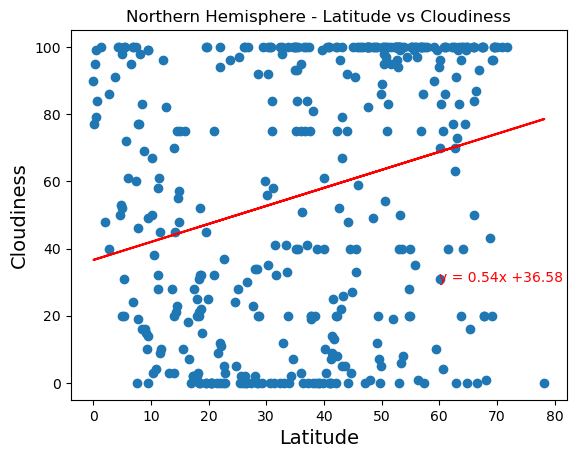

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
regression_plot(x_values, y_values, "Latitude", "Cloudiness", "Northern", (60,30))

The r value is 0.34


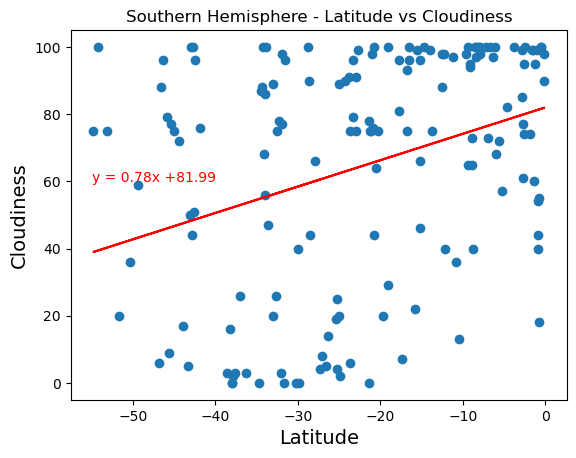

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
regression_plot(x_values, y_values, "Latitude", "Cloudiness", "Southern", (-55, 60))

There is a weak positive linear relationship between latitude and cloudiness for the northern hemisphere and a weak postive correlation for the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is 0.06


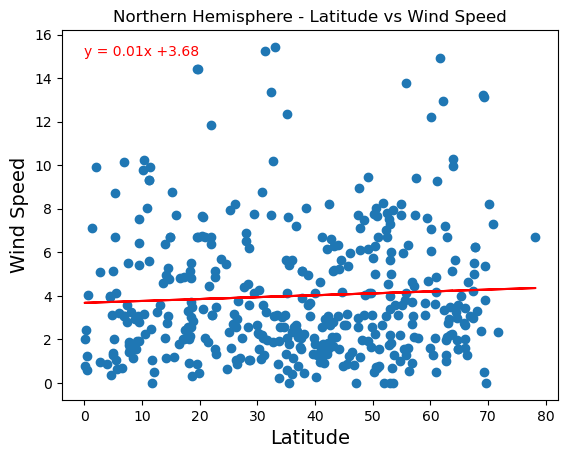

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
regression_plot(x_values, y_values, "Latitude", "Wind Speed", "Northern", (0,15))

The r value is -0.19


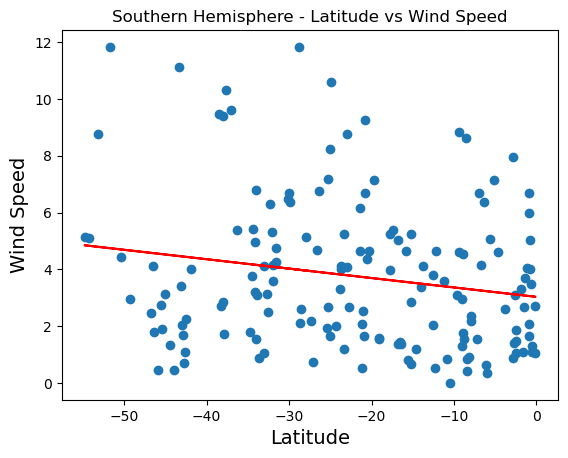

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
regression_plot(x_values, y_values, "Latitude", "Wind Speed", "Southern", (-40,13))

There is no linear relationship between latitude and wind speed for the northern hemisphere and a weak neagative correlation for the southern hemisphere.